<a href="https://colab.research.google.com/github/EnesAgirman/ArUco_Markers/blob/main/Enes_Agirman_ML_Documentation_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

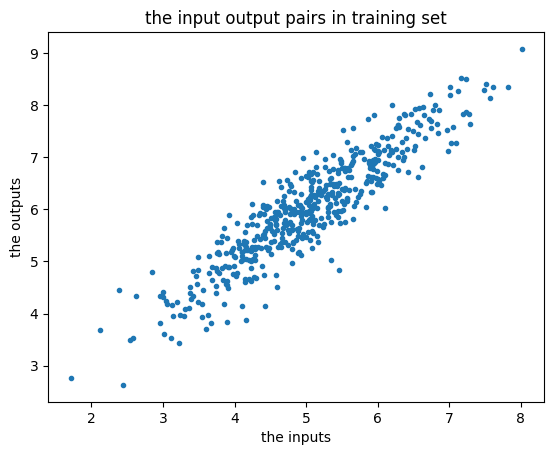

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# creating data

# Input data size
inputSize = 5000

#The mean on the x axis and the mean on the y axis
mean = np.array([5.0, 6.0])

cov = np.array([[1.0, 1], [1, 1.2]])  # The covariance matrix.
# For more info about the covariance matrix, see: https://www.youtube.com/watch?v=WBlnwvjfMtQ&ab_channel=Serrano.Academy

# Our input data
data = np.random.default_rng(seed=42).multivariate_normal(mean, cov, inputSize)
data = np.hstack((np.ones((data.shape[0], 1)), data))

# visualising data

# get the first 500 points from the first and second dimension of the data
plt.scatter(data[:500, 1], data[:500, 2], marker='.')
plt.title("the input output pairs in training set")
plt.xlabel("the inputs")
plt.ylabel("the outputs")
plt.show()

# The proportion of the data we have that we use for training set. We will use the data not used in training set in the test set
trainProportion = 0.9
trainSplit = int(trainProportion * data.shape[0])

X_train = data[:trainSplit, :2]
Y_train = data[:trainSplit, 2].reshape(-1, 1)

X_test = data[trainSplit:, :2]
Y_test = data[trainSplit:, 2].reshape(-1, 1)



In [101]:
from numpy.ma.core import squeeze
def hypothesis(aTheta, aX):
  result = np.dot(np.squeeze(aTheta), np.squeeze(aX) )
  return result

def BatchGradientDescent(aTheta, aTrainX, aTrainY, aAlpha):
  for i in range(4500):
    aTheta = aTheta + alpha * ( aTrainY[i] - hypothesis(np.squeeze(aTheta), aTrainX[i] ) ) * aTrainX[i]
  return aTheta

#initializing theta as zeros
print("X_train.shape[1]: " + str(X_train.shape[1]))
theta = np.zeros((1, X_train.shape[1]))

# The learning rate
alpha = 0.00000004

print("theta: \n" + str(theta))
print("X_train[1:2]: \n" + str(X_train[1:2]))

h = hypothesis( np.squeeze(theta), np.squeeze(X_train[1:2]))


print("h: \n" + str(h))



X_train.shape[1]: 2
theta: 
[[0. 0.]]
X_train[1:2]: 
[[1.         4.05444862]]
h: 
0.0


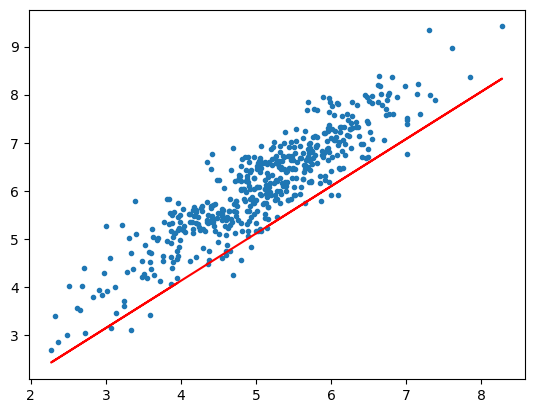

the absolute mean error for epoch 400 is % 14.855740786510205


In [102]:
count = 0
sum = 0
for i in range(450):
  if count%50 == 0:
    print(i)
    # predicting output for X_test
    print("X_test[i, :].reshape(1, -1): \n" + str(X_test[i, :].reshape(1, -1)))
    print("np.squeeze(theta.reshape(1, -1)): \n" + str(theta.reshape(1, -1)))
    # y_pred = hypothesis(X_test[i, :].reshape(1, -1), theta.reshape(1, -1))
    print("X_test[i, :]: " + str(X_test[:, :].shape))
    print("theta: " + str(theta.shape))
    y_pred = np.matmul(X_test[:, :], theta.reshape(2, 1))
    plt.scatter(X_test[:500, 1], Y_test[:500], marker='.')
    # print("hehehe: " + str(X_test[:, 1].shape))
    # print("hehehe: " + str(y_pred))
    plt.plot(X_test[:, 1], y_pred, color='red')
    clear_output(wait = False)
    plt.show()

    for j in range(50):
      v = np.squeeze(np.asarray(X_test[count + j].reshape(-1, 1)))
      v2 = np.squeeze(np.asarray(theta))
      h = hypothesis(v2, v)
      sum += abs(h - Y_test[count + j]) / Y_test[j]
    acc = sum / 50
    print(f"the absolute mean error for epoch {i} is % {float(acc) * 100}")

  theta = BatchGradientDescent(theta, X_train, Y_train, alpha)
  count += 1
  sum = 0




In [4]:
print(X_test[:, 1].shape)

(500,)


(500, 1)
(4500, 2)


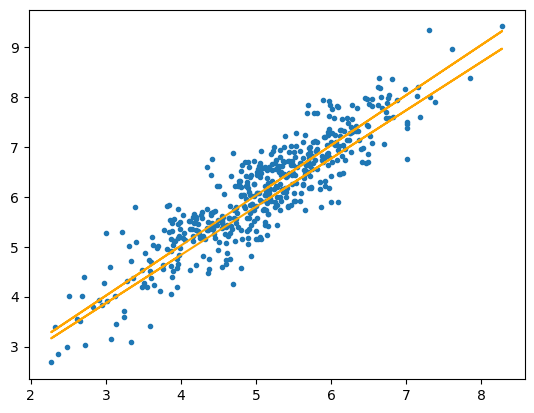

In [5]:
# predicting output for X_test
y_pred = hypothesis(X_test, theta)
print(Y_test.shape)
print(X_train.shape)
plt.scatter(X_test[:500, 1], Y_test[:500], marker='.')
plt.plot(X_test[:, 1], y_pred, color='orange')
plt.show()

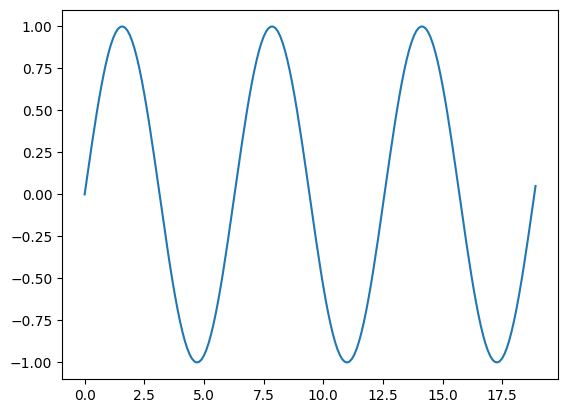

In [33]:
from IPython.display import clear_output
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for i in range(20):
    x = np.arange(0, i, 0.1);
    y = np.sin(x)

    ax.set_xlim(0, i)

    ax.cla()
    ax.plot(x, y)
    display(fig)

    clear_output(wait = True)
    plt.pause(0.5)
